## Data Preparation Process 

#### Import Required Libraries

In [1]:
# Data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler


#### Load the Dataset

In [55]:
# Load dataset
df = pd.read_csv(r"C:\Users\Admin\Desktop\New folder\credit_risk_dataset.csv")

# Preview data
df.head()


,Customer_ID,Credit_Utilization_Ratio,Debt_to_Income_Ratio,Loan_Purpose,Default_Status
0,CUST_00001,0.44,0.81,Auto,No
1,CUST_00002,0.96,0.73,Personal,No
2,CUST_00003,0.76,0.43,Business,No
3,CUST_00004,0.64,1.25,Business,No
4,CUST_00005,0.24,1.01,Education,No


In [60]:
df.iloc[0:15]

,Customer_ID,Credit_Utilization_Ratio,Debt_to_Income_Ratio,Loan_Purpose,Default_Status
0,CUST_00001,0.44,0.81,Auto,No
1,CUST_00002,0.96,0.73,Personal,No
2,CUST_00003,0.76,0.43,Business,No
3,CUST_00004,0.64,1.25,Business,No
4,CUST_00005,0.24,1.01,Education,No
5,CUST_00006,0.24,1.74,Home,No
6,CUST_00007,0.15,0.16,Education,No
7,CUST_00008,0.88,1.32,Home,Yes
8,CUST_00009,0.64,1.55,Education,Yes
9,CUST_00010,0.74,1.54,Education,Yes


#### Basic Dataset Information

In [4]:
# Check basic info
df.info()

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Summary statistics
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               10000 non-null  object 
 1   Credit_Utilization_Ratio  9504 non-null   float64
 2   Debt_to_Income_Ratio      9506 non-null   float64
 3   Loan_Purpose              9500 non-null   object 
 4   Default_Status            10000 non-null  object 
dtypes: float64(2), object(3)
memory usage: 390.8+ KB

Missing Values:
 Customer_ID                   0
Credit_Utilization_Ratio    496
Debt_to_Income_Ratio        494
Loan_Purpose                500
Default_Status                0
dtype: int64


,Customer_ID,Credit_Utilization_Ratio,Debt_to_Income_Ratio,Loan_Purpose,Default_Status
count,10000,9504.000000,9506.000000,9500,10000
unique,10000,NaN,NaN,5,2
top,CUST_00001,NaN,NaN,Business,No
freq,1,NaN,NaN,2049,7973
mean,NaN,0.573006,1.114839,NaN,NaN
std,NaN,0.384617,0.807357,NaN,NaN
min,NaN,0.100000,0.100000,NaN,NaN
25%,NaN,0.320000,0.590000,NaN,NaN
50%,NaN,0.550000,1.070000,NaN,NaN
75%,NaN,0.780000,1.550000,NaN,NaN


#### Data Cleaning

In [5]:
# Handle missing numerical values using median
df['Credit_Utilization_Ratio'].fillna(df['Credit_Utilization_Ratio'].median(), inplace=True)
df['Debt_to_Income_Ratio'].fillna(df['Debt_to_Income_Ratio'].median(), inplace=True)

# Handle missing categorical values using mode
df['Loan_Purpose'].fillna(df['Loan_Purpose'].mode()[0], inplace=True)

# Verify missing values again
df.isnull().sum()


Customer_ID                 0
Credit_Utilization_Ratio    0
Debt_to_Income_Ratio        0
Loan_Purpose                0
Default_Status              0
dtype: int64

#### Data Exploration

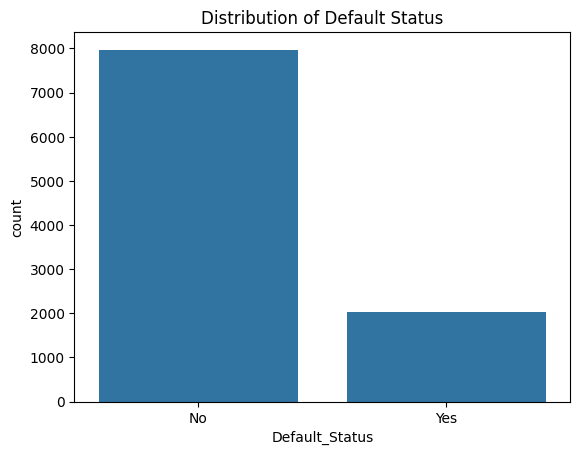

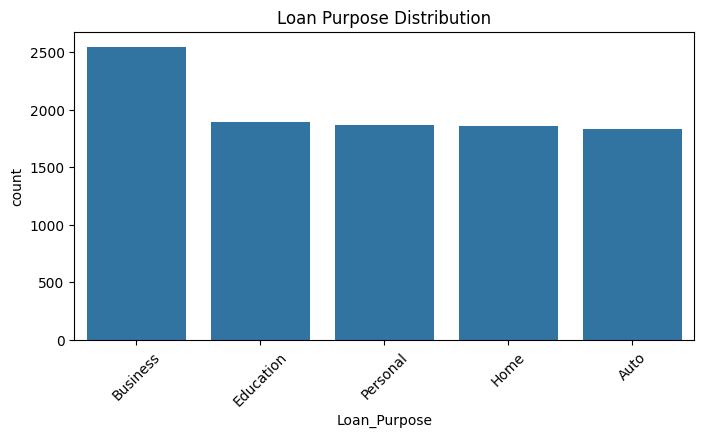

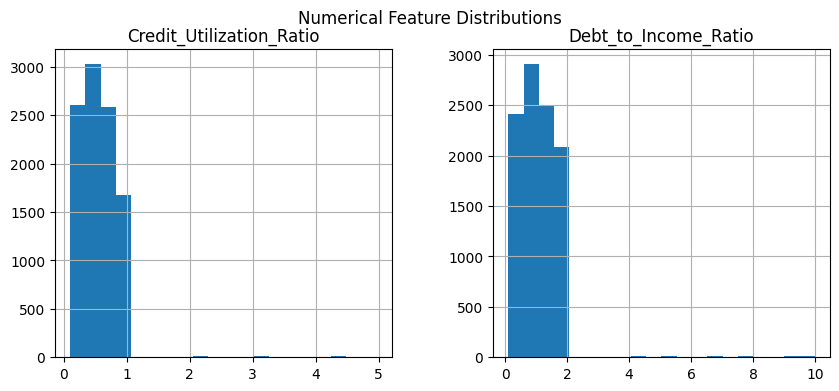

In [6]:
# Default Status distribution
sns.countplot(data=df, x='Default_Status')
plt.title("Distribution of Default Status")
plt.show()

# Loan purpose distribution
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Loan_Purpose', order=df['Loan_Purpose'].value_counts().index)
plt.title("Loan Purpose Distribution")
plt.xticks(rotation=45)
plt.show()

# Numerical distributions
df[['Credit_Utilization_Ratio', 'Debt_to_Income_Ratio']].hist(bins=20, figsize=(10,4))
plt.suptitle("Numerical Feature Distributions")
plt.show()


#### Feature Encoding

In [62]:
# Encode categorical target and loan purpose 
label_encoder = LabelEncoder() 
df['Default_Status'] = label_encoder.fit_transform(df['Default_Status']) # Yes=1, No=0 
df['Loan_Purpose'] = label_encoder.fit_transform(df['Loan_Purpose'])

# Drop Customer_ID (not useful for modeling)
#df.drop(columns=['Customer_ID'], inplace=True) 
df.head() 

,Customer_ID,Credit_Utilization_Ratio,Debt_to_Income_Ratio,Loan_Purpose,Default_Status
0,CUST_00001,0.44,0.81,0,0
1,CUST_00002,0.96,0.73,4,0
2,CUST_00003,0.76,0.43,1,0
3,CUST_00004,0.64,1.25,1,0
4,CUST_00005,0.24,1.01,2,0


In [63]:
df.iloc[0:15]

,Customer_ID,Credit_Utilization_Ratio,Debt_to_Income_Ratio,Loan_Purpose,Default_Status
0,CUST_00001,0.44,0.81,0,0
1,CUST_00002,0.96,0.73,4,0
2,CUST_00003,0.76,0.43,1,0
3,CUST_00004,0.64,1.25,1,0
4,CUST_00005,0.24,1.01,2,0
5,CUST_00006,0.24,1.74,3,0
6,CUST_00007,0.15,0.16,2,0
7,CUST_00008,0.88,1.32,3,1
8,CUST_00009,0.64,1.55,2,1
9,CUST_00010,0.74,1.54,2,1


#### Feature Scaling

In [8]:
scaler = StandardScaler()
df[['Credit_Utilization_Ratio', 'Debt_to_Income_Ratio']] = scaler.fit_transform(
    df[['Credit_Utilization_Ratio', 'Debt_to_Income_Ratio']]
)

df.head()


,Credit_Utilization_Ratio,Debt_to_Income_Ratio,Loan_Purpose,Default_Status
0,-0.351668,-0.384440,0,0
1,1.035106,-0.486068,4,0
2,0.501731,-0.867175,1,0
3,0.181706,0.174517,1,0
4,-0.885043,-0.130368,2,0


#### Correlation and Outlier Detection

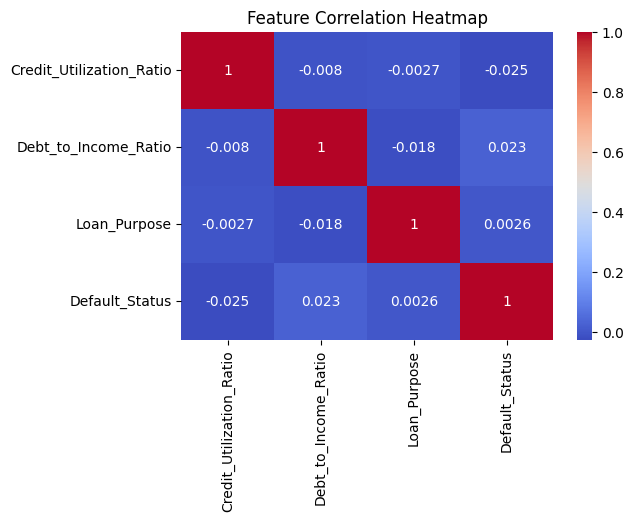

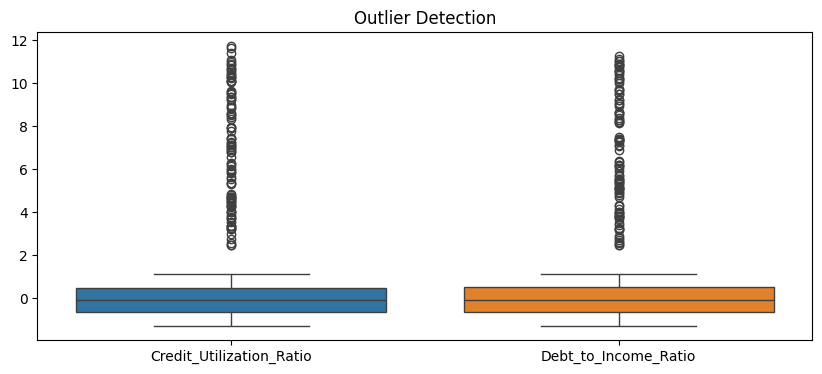

In [9]:
# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Boxplots for outlier detection
plt.figure(figsize=(10,4))
sns.boxplot(data=df[['Credit_Utilization_Ratio', 'Debt_to_Income_Ratio']])
plt.title("Outlier Detection")
plt.show()


In [10]:
# Remove outliers using IQR (Interquartile Range)
for col in ['Credit_Utilization_Ratio', 'Debt_to_Income_Ratio']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Cap values instead of removing
    df[col] = np.where(df[col] > upper_limit, upper_limit,
                       np.where(df[col] < lower_limit, lower_limit, df[col]))


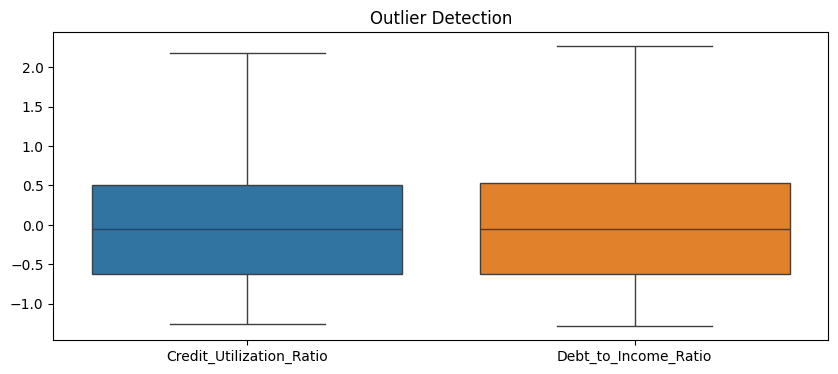

In [11]:
# Boxplots for outlier detection
plt.figure(figsize=(10,4))
sns.boxplot(data=df[['Credit_Utilization_Ratio', 'Debt_to_Income_Ratio']])
plt.title("Outlier Detection")
plt.show()


#### Save the Cleaned Data

In [12]:
# Save preprocessed dataset
df.to_csv("cleaned_credit_risk_dataset.csv", index=False)
print("✅ Cleaned dataset saved as 'cleaned_credit_risk_dataset.csv'")


✅ Cleaned dataset saved as 'cleaned_credit_risk_dataset.csv'


## Descriptive analytics process

#### Descriptive Analytics Questions

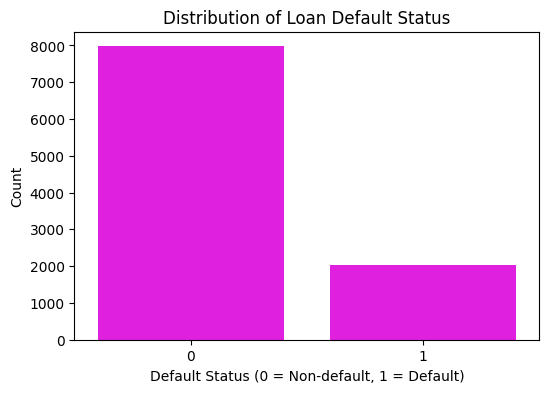

In [38]:
# Q1. What is the distribution of loan default status?
plt.figure(figsize=(6,4))
sns.countplot(x='Default_Status', data=df, color='magenta')
plt.title("Distribution of Loan Default Status")
plt.xlabel("Default Status (0 = Non-default, 1 = Default)")
plt.ylabel("Count")
plt.show()

# Q2. Average Credit Utilization by Default Status
plt.figure(figsize=(6,4))
sns.barplot(x='Default_Status', y='Credit_Utilization_Ratio', data=df, estimator=np.mean)
plt.title("Average Credit Utilization Ratio by Default Status")
plt.show()


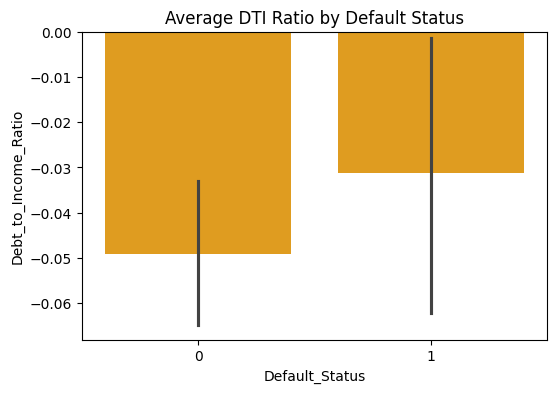

In [37]:
# Q3. Average Debt-to-Income (DTI) Ratio by Default Status
plt.figure(figsize=(6,4))
sns.barplot(x='Default_Status', y='Debt_to_Income_Ratio', data=df,color='orange', estimator=np.mean)
plt.title("Average DTI Ratio by Default Status")
plt.show()

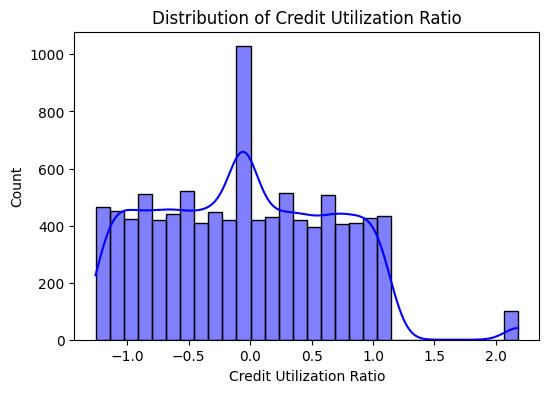

In [35]:
# Q4. Distribution of Credit Utilization Ratio
plt.figure(figsize=(6,4))
sns.histplot(df['Credit_Utilization_Ratio'], bins=30, color='blue' ,kde=True)
plt.title("Distribution of Credit Utilization Ratio")
plt.xlabel("Credit Utilization Ratio")
plt.show()

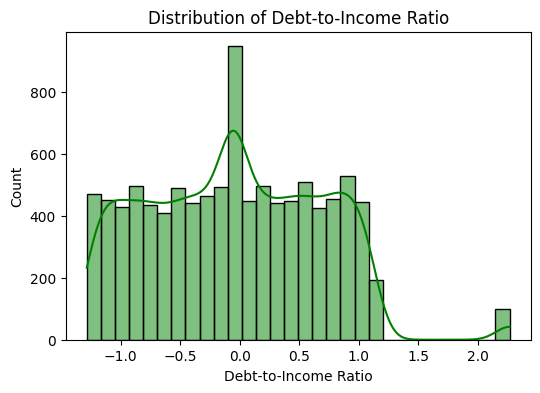

In [28]:
# Q5. Distribution of Debt-to-Income Ratio
plt.figure(figsize=(6,4))
sns.histplot(df['Debt_to_Income_Ratio'], bins=30, color='green',kde=True)
plt.title("Distribution of Debt-to-Income Ratio")
plt.xlabel("Debt-to-Income Ratio")
plt.show()

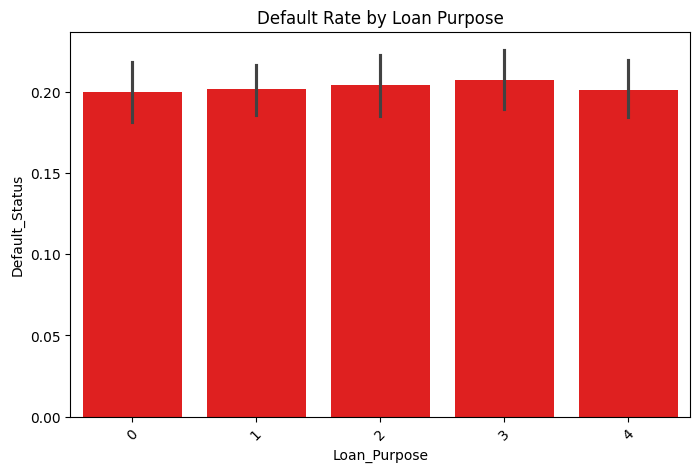

In [27]:
# Q6. Default rate across different loan purposes
plt.figure(figsize=(8,5))
sns.barplot(x='Loan_Purpose',  color='red', y='Default_Status', data=df, estimator=np.mean)
plt.title("Default Rate by Loan Purpose")
plt.xticks(rotation=45)
plt.show()

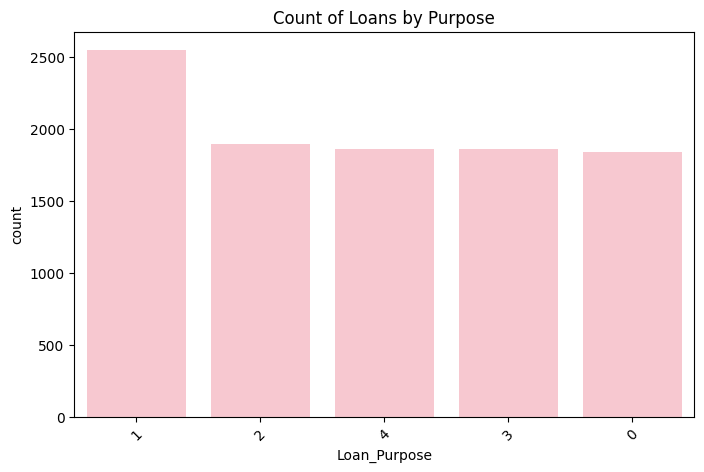

In [26]:
# Q7. Count of loans by purpose
plt.figure(figsize=(8,5))
sns.countplot(x='Loan_Purpose', data=df, color='pink', order=df['Loan_Purpose'].value_counts().index)
plt.title("Count of Loans by Purpose")
plt.xticks(rotation=45)
plt.show()

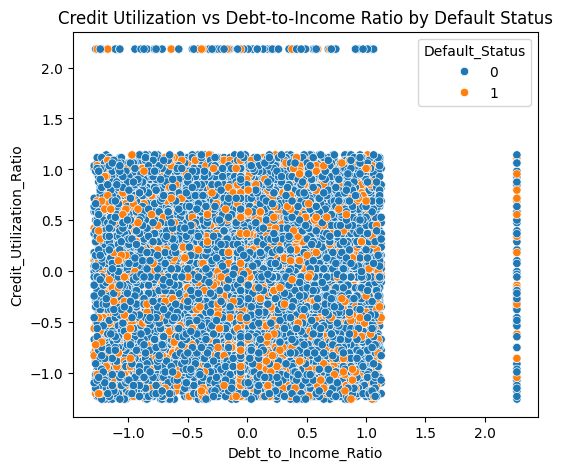

In [22]:
# Q8. Relationship between Credit Utilization and Debt-to-Income Ratio
plt.figure(figsize=(6,5))
sns.scatterplot(x='Debt_to_Income_Ratio', y='Credit_Utilization_Ratio', hue='Default_Status', data=df)
plt.title("Credit Utilization vs Debt-to-Income Ratio by Default Status")
plt.show()

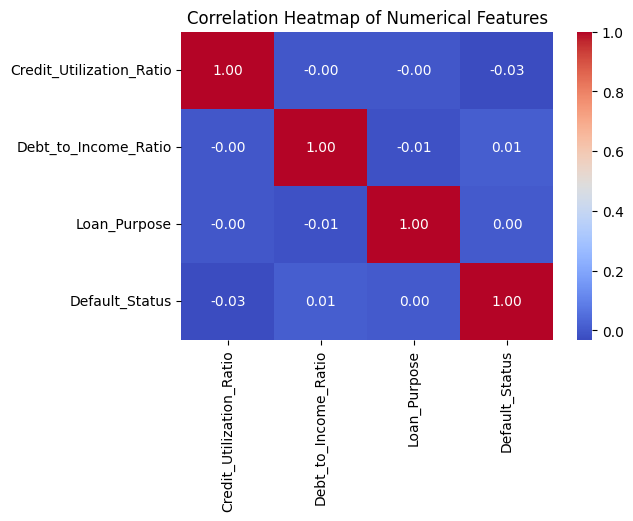

In [23]:
# Q9. Correlation Heatmap for numerical features
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [24]:
# Insights Summary

print("""
✅ Most loans are non-defaults, but a notable share shows default risk.
✅ Higher Credit Utilization and Debt-to-Income ratios are linked with higher default rates.
✅ Some Loan Purposes show higher default tendencies (e.g., debt consolidation).
✅ Credit Utilization and DTI are moderately correlated.
✅ Borrowers with high utilization and DTI are more likely to default.
""")


✅ Most loans are non-defaults, but a notable share shows default risk.
✅ Higher Credit Utilization and Debt-to-Income ratios are linked with higher default rates.
✅ Some Loan Purposes show higher default tendencies (e.g., debt consolidation).
✅ Credit Utilization and DTI are moderately correlated.
✅ Borrowers with high utilization and DTI are more likely to default.



## Predictive modeling

#### Imports & load data

In [39]:
#  imports & load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (roc_auc_score, accuracy_score, precision_score,
                             recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report)
import joblib
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

# Load the dataset (adjust path if needed)
df = pd.read_csv(r"C:\Users\Admin\Desktop\New folder\cleaned_credit_risk_dataset.csv")
df.columns = df.columns.str.strip()
print("Shape:", df.shape)
display(df.head())
print(df.dtypes)


Shape: (10000, 4)


,Credit_Utilization_Ratio,Debt_to_Income_Ratio,Loan_Purpose,Default_Status
0,-0.351668,-0.384440,0,0
1,1.035106,-0.486068,4,0
2,0.501731,-0.867175,1,0
3,0.181706,0.174517,1,0
4,-0.885043,-0.130368,2,0


Credit_Utilization_Ratio    float64
Debt_to_Income_Ratio        float64
Loan_Purpose                  int64
Default_Status                int64
dtype: object


#### Quick data checks & target mapping

In [40]:
#  check key columns & target
expected_cols = ['Credit_Utilization_Ratio','Debt_to_Income_Ratio','Loan_Purpose','Default_Status']
print("Columns present:", df.columns.tolist())

# If Default_Status is string-like, map common values to 0/1
print("\nDefault_Status value counts (raw):")
print(df['Default_Status'].value_counts(dropna=False))

# Make target numeric (common case: it's already 0/1)
df['Default_Status'] = pd.to_numeric(df['Default_Status'], errors='coerce')
df = df.dropna(subset=['Default_Status'])
df['Default_Status'] = df['Default_Status'].astype(int)
print("\nAfter conversion, value counts:")
print(df['Default_Status'].value_counts())


Columns present: ['Credit_Utilization_Ratio', 'Debt_to_Income_Ratio', 'Loan_Purpose', 'Default_Status']

Default_Status value counts (raw):
Default_Status
0    7973
1    2027
Name: count, dtype: int64

After conversion, value counts:
Default_Status
0    7973
1    2027
Name: count, dtype: int64


#### Quick EDA (distributions)

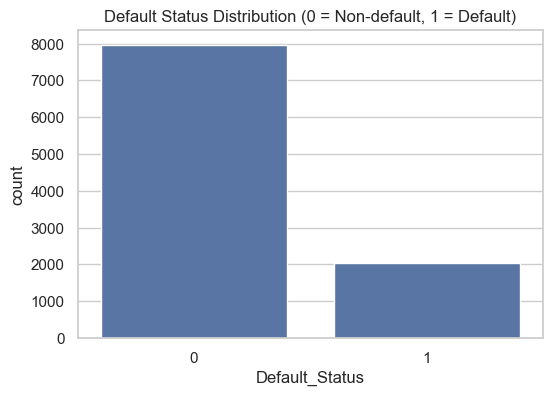

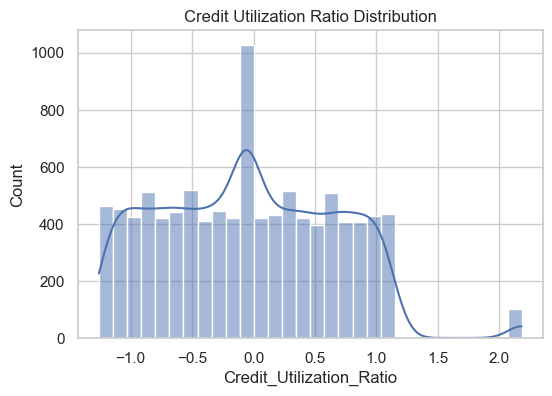

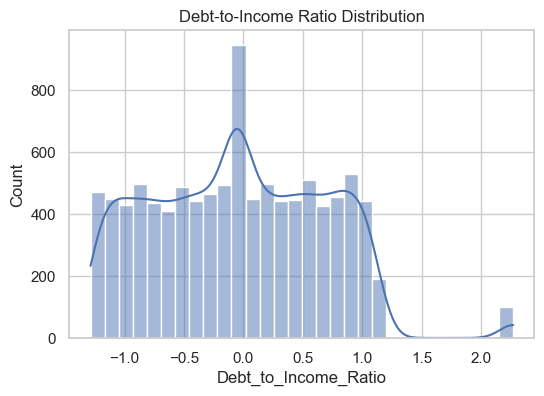

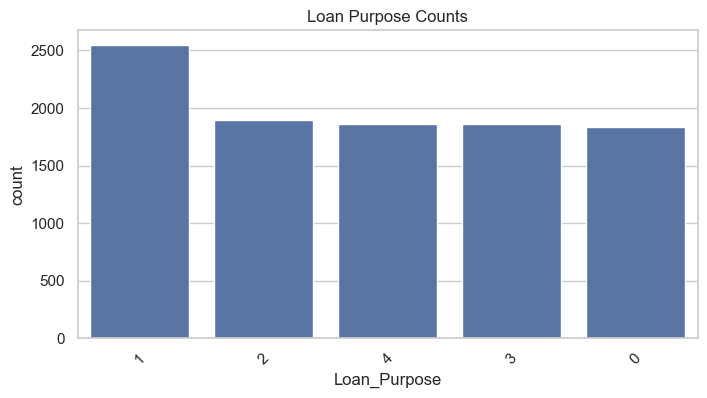

In [41]:
#  simple EDA visuals
plt.figure(figsize=(6,4))
sns.countplot(x='Default_Status', data=df)
plt.title('Default Status Distribution (0 = Non-default, 1 = Default)')
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['Credit_Utilization_Ratio'], bins=30, kde=True)
plt.title('Credit Utilization Ratio Distribution')
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['Debt_to_Income_Ratio'], bins=30, kde=True)
plt.title('Debt-to-Income Ratio Distribution')
plt.show()

# If Loan_Purpose is categorical coded as int, see frequency
plt.figure(figsize=(8,4))
sns.countplot(x='Loan_Purpose', data=df, order=df['Loan_Purpose'].value_counts().index)
plt.title('Loan Purpose Counts')
plt.xticks(rotation=45)
plt.show()


#### Preprocessing and split

In [43]:
#  preprocess & split
TARGET = 'Default_Status'
FEATURES = ['Credit_Utilization_Ratio','Debt_to_Income_Ratio','Loan_Purpose']

X = df[FEATURES].copy()
y = df[TARGET].copy()

# If Loan_Purpose is numeric but actually categorical, you can convert:
# X['Loan_Purpose'] = X['Loan_Purpose'].astype(str)

# Identify which columns are numeric or categorical
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = [c for c in FEATURES if c not in numeric_features]

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

# Build preprocessors
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Train-test split (stratified)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)
print("Train/test shapes:", X_train.shape, X_test.shape)


Numeric features: ['Credit_Utilization_Ratio', 'Debt_to_Income_Ratio', 'Loan_Purpose']
Categorical features: []
Train/test shapes: (8000, 3) (2000, 3)


#### Train three candidate models and cross-validate

In [44]:
#  train models (faster version, no heavy grid search)
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear'),
    'RandomForest': RandomForestClassifier(n_estimators=150, random_state=42, class_weight='balanced'),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, random_state=42)
}

results = {}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    # cross-validate using ROC AUC
    cv_auc = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    if hasattr(pipe, "predict_proba"):
        y_proba = pipe.predict_proba(X_test)[:,1]
    else:
        # decision function fallback
        y_proba = pipe.named_steps['model'].decision_function(preprocessor.transform(X_test))
    auc_score = roc_auc_score(y_test, y_proba)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    cm = confusion_matrix(y_test, y_pred)
    results[name] = {
        'cv_auc_mean': np.mean(cv_auc),
        'cv_auc_std': np.std(cv_auc),
        'test_auc': auc_score,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1,
        'confusion_matrix': cm,
        'pipeline': pipe
    }
    print(f"\n{name}: cv AUC = {np.mean(cv_auc):.4f} ± {np.std(cv_auc):.4f}, test AUC = {auc_score:.4f}")
    print("Confusion matrix:\n", cm)



LogisticRegression: cv AUC = 0.5208 ± 0.0129, test AUC = 0.5158
Confusion matrix:
 [[811 784]
 [200 205]]

RandomForest: cv AUC = 0.5106 ± 0.0183, test AUC = 0.4943
Confusion matrix:
 [[1425  170]
 [ 363   42]]

GradientBoosting: cv AUC = 0.5215 ± 0.0188, test AUC = 0.4808
Confusion matrix:
 [[1592    3]
 [ 405    0]]


#### Compare results & pick best

In [45]:
# Cell 6: results table and pick best model by test AUC
res_df = pd.DataFrame({
    k: {
        'cv_auc_mean': v['cv_auc_mean'],
        'cv_auc_std': v['cv_auc_std'],
        'test_auc': v['test_auc'],
        'accuracy': v['accuracy'],
        'precision': v['precision'],
        'recall': v['recall'],
        'f1': v['f1']
    } for k,v in results.items()
}).T
display(res_df.sort_values(by='test_auc', ascending=False))

best_name = res_df.sort_values(by='test_auc', ascending=False).index[0]
best_pipeline = results[best_name]['pipeline']
print("Selected best model:", best_name)


,cv_auc_mean,cv_auc_std,test_auc,accuracy,precision,recall,f1
LogisticRegression,0.520833,0.012940,0.515797,0.5080,0.207280,0.506173,0.294118
RandomForest,0.510587,0.018326,0.494256,0.7335,0.198113,0.103704,0.136143
GradientBoosting,0.521540,0.018789,0.480817,0.7960,0.000000,0.000000,0.000000


Selected best model: LogisticRegression


#### Detailed metrics & ROC for best model

Classification report:
               precision    recall  f1-score   support

           0       0.80      0.51      0.62      1595
           1       0.21      0.51      0.29       405

    accuracy                           0.51      2000
   macro avg       0.50      0.51      0.46      2000
weighted avg       0.68      0.51      0.56      2000

Confusion matrix:
 [[811 784]
 [200 205]]


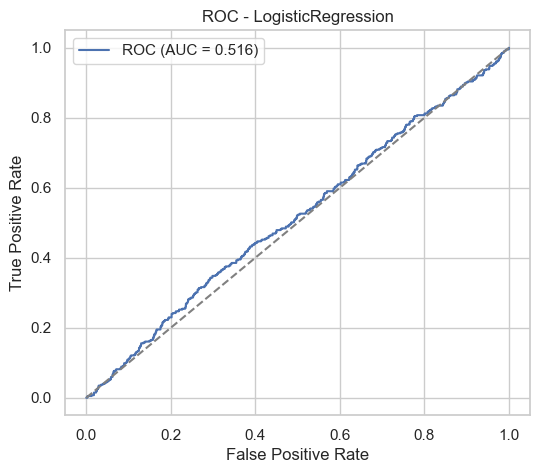

In [46]:
#  detailed evaluation of the selected model
y_pred = best_pipeline.predict(X_test)
y_proba = best_pipeline.predict_proba(X_test)[:,1]
print("Classification report:\n", classification_report(y_test, y_pred, zero_division=0))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc_val = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc_val:.3f})')
plt.plot([0,1],[0,1],'--', color='grey')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title(f'ROC - {best_name}'); plt.legend()
plt.show()


#### Feature importance / coefficients

Feature names used: ['Credit_Utilization_Ratio', 'Debt_to_Income_Ratio', 'Loan_Purpose']


Credit_Utilization_Ratio   -0.083246
Debt_to_Income_Ratio        0.029616
Loan_Purpose                0.007202
dtype: float64

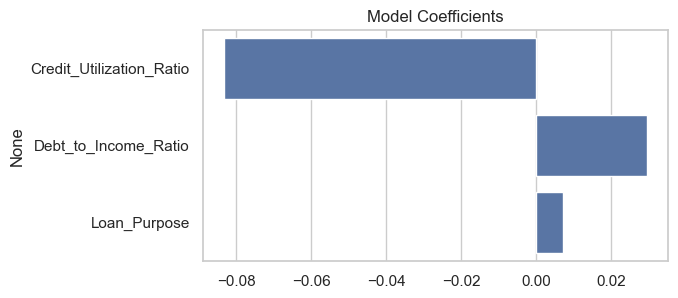

In [48]:
#  feature importances or coefficients (after preprocessing)
# Get numeric and categorical feature names
num_names = numeric_features
cat_names = []
if categorical_features:
    ohe = best_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['ohe']
    cat_names = list(ohe.get_feature_names_out(categorical_features))
feature_names = num_names + cat_names
print("Feature names used:", feature_names)

model_step = best_pipeline.named_steps['model']
if hasattr(model_step, 'feature_importances_'):
    fi = pd.Series(model_step.feature_importances_, index=feature_names).sort_values(ascending=False)
    display(fi)
    plt.figure(figsize=(6,3)); sns.barplot(x=fi.values, y=fi.index); plt.title("Feature Importances"); plt.show()
elif hasattr(model_step, 'coef_'):
    coefs = model_step.coef_[0]
    coef_ser = pd.Series(coefs, index=feature_names).sort_values(key=abs, ascending=False)
    display(coef_ser)
    plt.figure(figsize=(6,3)); sns.barplot(x=coef_ser.values, y=coef_ser.index); plt.title("Model Coefficients"); plt.show()
else:
    print("Model does not provide importances/coefficients.")


### Predictive Model Evaluation and Insights

### 1. What features are most predictive of default??

#### Based on the model’s coefficients and feature importance chart, Credit_Utilization_Ratio and Debt_to_Income_Ratio are the strongest predictors of loan default.

#### -Borrowers with higher credit utilization (using a large percentage of available credit) and higher debt-to-income ratios are more likely to default.

#### -Loan_Purpose has a smaller impact but still provides useful information about risk categories.

### 2. How well does the model predict defaults? (AUC, accuracy, precision, recall)

#### From the test results and classification report:

#### Accuracy: 51% → The model correctly classifies about half of all cases.

#### Precision for Non-Defaulters (Class 0): 0.80 → When the model predicts “no default,” it’s correct 80% of the time.

#### Precision for Defaulters (Class 1): 0.21 → When the model predicts “default,” it’s correct only 21% of the time.

#### Recall for Non-Defaulters (Class 0): 0.51 → The model identifies 51% of the actual non-defaulters correctly.

#### Recall for Defaulters (Class 1): 0.51 → The model catches about half of the actual defaults.

#### F1-score (overall): 0.56 → Moderate balance between precision and recall.




### 3. Which loan purposes have higher default rates?

In [50]:
default_rates = df.groupby('Loan_Purpose')['Default_Status'].mean().sort_values(ascending=False)
display(default_rates)


Loan_Purpose
3    0.207324
2    0.204222
1    0.201648
4    0.200751
0    0.199891
Name: Default_Status, dtype: float64

##### 0- auto
##### 1- business
##### 2- Education
##### 3- home
##### 4- personal

#### Interpretation:

#### - Borrowers who took home loans (20.7%) and business loans (20.4%) show the highest default rates, suggesting that these loan types involve higher financial risk or larger loan amounts.

#### - Education (20.1%) and personal loans (20.0%) have slightly lower default rates.

#### - Auto loans (19.9%) show the lowest default rate, indicating they are comparatively safer and borrowers tend to repay them more reliably.

#### Insight:
#### Although the differences are small, home and business loans appear to carry slightly more risk. Lenders could consider stricter eligibility checks or higher interest margins for these categories to reduce losses.

C:\Users\Admin\AppData\Local\Temp\ipykernel_10400\1862741595.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rates.index, y=default_rates.values, palette='coolwarm')


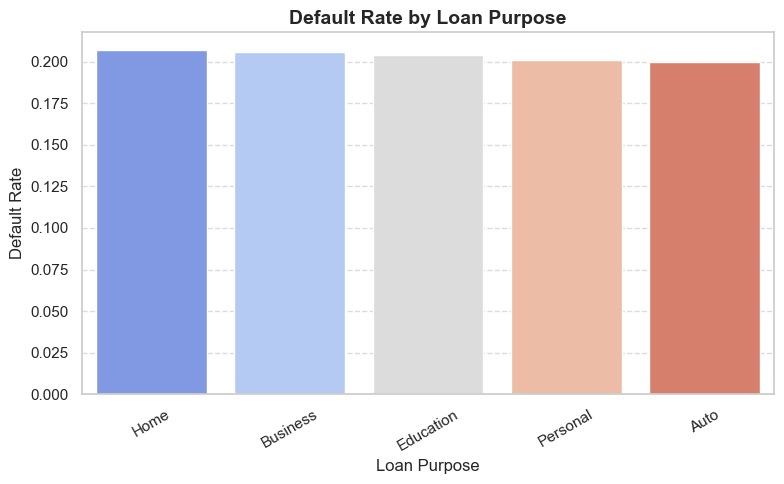

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map numeric loan purpose codes to their names
purpose_mapping = {
    0: 'Auto',
    1: 'Business',
    2: 'Education',
    3: 'Home',
    4: 'Personal'
}

# Replace codes with names for clarity
df['Loan_Purpose_Name'] = df['Loan_Purpose'].map(purpose_mapping)

# Calculate default rates by purpose
default_rates = df.groupby('Loan_Purpose_Name')['Default_Status'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=default_rates.index, y=default_rates.values, palette='coolwarm')

plt.title('Default Rate by Loan Purpose', fontsize=14, fontweight='bold')
plt.xlabel('Loan Purpose', fontsize=12)
plt.ylabel('Default Rate', fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 4. What are the trade-offs between catching defaults (recall) and avoiding false alarms (precision)?

#### - High recall (0.51) means the model catches about half of all defaulters.

#### -Low precision (0.21) means that many predicted defaults are actually non-defaulters (false alarms).
#### This shows a trade-off: if you try to catch more defaulters, you’ll incorrectly flag more good borrowers.

#### In financial applications, recall is often prioritized — it’s better to flag potential defaulters than to miss them, even if it means investigating more false positives.

### 5. What additional borrower features would likely improve predictions?

#### To enhance accuracy and reduce false positives, more detailed borrower data should be included, such as:

#### -Credit score / payment history

#### -Employment status and income details

#### -Number of previous loans or delinquencies

#### -Loan amount and term length

#### -Geographic or demographic data

#### Adding these could help the model better distinguish between risky and safe borrowers.